<a id='contenidos'></a>

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descripción-del-proyecto" data-toc-modified-id="Descripción-del-proyecto-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descripción del proyecto</a></span></li><li><span><a href="#Inicialización" data-toc-modified-id="Inicialización-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inicialización</a></span></li><li><span><a href="#Cargar-los-datos" data-toc-modified-id="Cargar-los-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cargar los datos</a></span></li><li><span><a href="#Preprocesamiento-de-los-datos" data-toc-modified-id="Preprocesamiento-de-los-datos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocesamiento de los datos</a></span><ul class="toc-item"><li><span><a href="#Valores-nulos" data-toc-modified-id="Valores-nulos-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Valores nulos</a></span></li><li><span><a href="#Valores-duplicados" data-toc-modified-id="Valores-duplicados-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Valores duplicados</a></span></li></ul></li><li><span><a href="#Análisis-exploratorio-de-los-datos" data-toc-modified-id="Análisis-exploratorio-de-los-datos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Análisis exploratorio de los datos</a></span></li><li><span><a href="#Comparación-entre-el-grupo-de-control-y-el-grupo-de-prueba" data-toc-modified-id="Comparación-entre-el-grupo-de-control-y-el-grupo-de-prueba-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Comparación entre el grupo de control y el grupo de prueba</a></span><ul class="toc-item"><li><span><a href="#Prueba-t-student" data-toc-modified-id="Prueba-t-student-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Prueba t-student</a></span></li><li><span><a href="#Prueba-Z-para-dos-proporciones" data-toc-modified-id="Prueba-Z-para-dos-proporciones-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Prueba Z para dos proporciones</a></span></li></ul></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

## Descripción del proyecto  
Hemos recibido una tarea analítica de una tienda en línea internacional. Nuestros predecesores no consiguieron completarla: lanzaron una prueba A/B y luego abandonaron. Solo dejaron las especificaciones técnicas y los resultados de las pruebas.

**Descripción técnica**  
- Nombre de la prueba: recommender_system_test
- Grupos: А (control), B (nuevo embudo de pago)
- Launch date: 2020-12-07
- Fecha en la que dejaron de aceptar nuevos usuarios: 2020-12-21
- Fecha de finalización: 2021-01-01
- Audiencia: 15% de los nuevos usuarios de la región de la UE
- Propósito de la prueba: probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado
- Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (el evento product_page), instancias de agregar artículos al carrito de compras (product_card) y compras (purchase). En cada etapa del embudo product_page → product_card → purchase, habrá al menos un 10% de aumento.
- Número previsto de participantes de la prueba: 6 000

[Volver a contenidos](#contenidos)
## Inicialización 
En esta sección vamos a cargar las librerías para el estudio

In [52]:
import pandas as pd
import statsmodels.api as sm
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

sns.set_palette(palette='tab10')

[Volver a contenidos](#contenidos)
## Cargar los datos  
En esta sección vamos a cargar el set de datos y revisar que las variables tengan el tipo de datos adecuado.

In [53]:
# creamos el dataframe que contiene el calendario de eventos de marketing para 2020
try:
    ab_project_marketing_event_us=pd.read_csv('ab_project_marketing_event_us.csv',sep=',',parse_dates=['start_dt','finish_dt'])
except:
    ab_project_marketing_event_us=pd.read_csv('/datasets/ab_project_marketing_events_us.csv',sep=',',\
                                              parse_dates=['start_dt','finish_dt'])

In [54]:
"""creamos el dataframe que contiene los datos de los usuarios que se registraron en la tienda
en línea desde el 7 hasta el 21 de diciembre de 2020"""
try:
    final_ab_new_users_upd_us=pd.read_csv('final_ab_new_users_upd_us.csv',sep=',',parse_dates=['first_date'])
except:
    final_ab_new_users_upd_us=pd.read_csv('/datasets/final_ab_new_users_upd_us.csv',sep=',',parse_dates=['first_date'])

In [55]:
"""creamos el dataframe que contiene los eventos de los nuevos usuarios en el período comprendido entre el 7 de
diciembre de 2020 y el 1 de enero de 2021"""
try:
    final_ab_events_upd_us=pd.read_csv('final_ab_events_upd_us.csv',sep=',',parse_dates=['event_dt'])
except:
    final_ab_events_upd_us=pd.read_csv('/datasets/final_ab_events_upd_us.csv',sep=',',parse_dates=['event_dt'])

In [56]:
"""creamos el dataframe que contiene los datos de los participantes de la prueba"""
try:
    final_ab_participants_upd_us=pd.read_csv('final_ab_participants_upd_us.csv',sep=',')
except:
    final_ab_participants_upd_us=pd.read_csv('/datasets/final_ab_participants_upd_us.csv',sep=',')

In [57]:
# mostramos información general del calendario de eventos
ab_project_marketing_event_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [58]:
# mostramos parte del calendario de eventos
ab_project_marketing_event_us.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


---
Estructura ab_project_marketing_events_us.csv:
- name: el nombre del evento de marketing
- regions: regiones donde se llevará a cabo la campaña publicitaria
- start_dt: fecha de inicio de la campaña
- finish_dt: fecha de finalización de la campaña

In [59]:
# mostramos información general de los usuarios registrados
final_ab_new_users_upd_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [60]:
# mostramos parte de los usuarios registrados
final_ab_new_users_upd_us.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


---
Estructura final_ab_new_users_upd_us.csv:
- user_id
- first_date: fecha de inscripción
- region
- device: dispositivo utilizado para la inscripción

In [61]:
# mostramos información general de los eventos de los usuarios
final_ab_events_upd_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [62]:
# mostramos parte de los eventos de los usuarios
final_ab_events_upd_us.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


---
Estructura final_ab_events_upd_us.csv:
- user_id
- event_dt: fecha y hora del evento
- event_name: nombre del tipo de evento
- details: datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos purchase)

In [63]:
# mostramos información general de los participantes de la prueba
final_ab_participants_upd_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [64]:
# mostramos parte de los participantes de la prueba
final_ab_participants_upd_us.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


---
Estructura final_ab_participants_upd_us.csv:
- user_id
- ab_test: nombre de la prueba
- group: el grupo de prueba al que pertenecía el usuario

[Volver a contenidos](#contenidos)
## Preprocesamiento de los datos

Observamos que los nombres de las columnas están escritas correctamente empleando **snake_case** y que el tipo de datos es correcto.

### Valores nulos

Para el caso de valores nulos, notamos que solo el dataframe `'final_ab_events_upd_us'` que contiene los datos de los eventos de los usuarios tiene valores nulos.

In [65]:
# buscamos los valores nulos en el dataframe de los eventos de los usuarios
final_ab_events_upd_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [66]:
# buscamos los eventos en los cuales hay valores nulos
final_ab_events_upd_us.groupby('event_name')['details'].count()

event_name
login               0
product_cart        0
product_page        0
purchase        60314
Name: details, dtype: int64

Notamos que los valores no nulos en `'details'` pertenecen al evento `'purchase'`, es decir; no tenemos valores nulos para las compras hechas. Por lo que al parecer no tenemos problemas en los datos.

### Valores duplicados  
Revisamos si tenemos registros duplicados en cada uno de los dataframes.

In [67]:
# revisamos valores duplicados en el calendario de eventos
ab_project_marketing_event_us.duplicated().sum()

0

In [68]:
# revisamos valores duplicados en el dataframe de usuarios registrados
final_ab_new_users_upd_us.duplicated().sum()

0

In [69]:
# revisamos valores duplicados en el dataframe de los eventos de los usuarios
final_ab_events_upd_us.duplicated().sum()

0

In [70]:
# revisamos valores duplicados en el dataframe de los participantes en la prueba
final_ab_participants_upd_us.duplicated().sum()

0

**No tenemos valores faltantes ni duplicados en los set de datos.** Antes de proceder al análisis exploratorio de los datos vamos a unir los dataframes para poder realizar los análisis posteriores.

In [71]:
# para unir el dataframe de eventos del usuario con el calendario de eventos necesitamos crear una columna con la fecha de 'event_dt'
final_ab_events_upd_us['event_date']=final_ab_events_upd_us['event_dt'].values.astype('datetime64[D]')
final_ab_events_upd_us.shape

(423761, 5)

In [72]:
# unimos los eventos de los usuarios con su fecha correspondiente en el calendario de eventos 
ab_users_events=final_ab_events_upd_us.merge(ab_project_marketing_event_us,left_on='event_date',right_on='start_dt',how='left')
ab_users_events.shape

(423761, 9)

Tenemos ahora asociado para cada evento el nombre del evento en el calendario. Unamos ahora el registro de usuarios con los datos de los participantes en la prueba.

In [73]:
# creamos un dataframe que contenga los usuarios que se registraron y participaron en la prueba
# unimos para cada registro de usuario su participacion en la prueba, unimos usando el 'user_id'
ab_users_groups=final_ab_new_users_upd_us.merge(final_ab_participants_upd_us,on='user_id',how='inner')
ab_users_groups.shape

(14525, 6)

In [74]:
# agrupamos por la columna 'ab_test'
ab_users_groups.groupby('ab_test')['group'].value_counts()

ab_test                  group
interface_eu_test        A        5467
                         B        5383
recommender_system_test  A        2747
                         B         928
Name: group, dtype: int64

Notamos que tenemos dos tipos de pruebas registradas, estamos interesados solo en la prueba `'recommender_system_test'`. En esta prueba tenemos dos grupos, el grupo A con 2,747 participantes y el grupo B con 928.

Revisemos que ningún participante de la prueba `interface_eu_test` haya participado en la prueba `recommender_system_test`.

In [75]:
# obtenemos la lista de participantes en la prueba 'interface_eu_test'
list_users_interface=ab_users_groups[ab_users_groups['ab_test']=='interface_eu_test']['user_id'].unique()

In [76]:
# obtenemos la lista de participantes en la prueba 'recommender_system_test'
list_users_system=ab_users_groups[ab_users_groups['ab_test']=='recommender_system_test']['user_id'].unique()

In [77]:
"""creamos dos conjuntos con los 'user_id' de cada grupo y buscamos su intersección para ver los usuarios que
aparecen en ambas pruebas"""

set1 = set(list_users_interface)
set2 = set(list_users_system)

set3 = set1 & set2

# usuarios en ambas pruebas
list_users_intersec = list(set3)
print(f'Hay {len(list_users_intersec)} usuarios que aparecen en ambas pruebas.')

Hay 887 usuarios que aparecen en ambas pruebas.


In [78]:
# verifiquemos que efectivamente esos usuarios aparecen en ambas pruebas
ab_users_groups[ab_users_groups['user_id'].isin(list_users_intersec)].sort_values('user_id').head(10)

,user_id,first_date,region,device,group,ab_test
13995,001064FEAAB631A1,2020-12-20,EU,Android,B,recommender_system_test
13996,001064FEAAB631A1,2020-12-20,EU,Android,B,interface_eu_test
3431,00341D8401F0F665,2020-12-21,EU,iPhone,A,recommender_system_test
3432,00341D8401F0F665,2020-12-21,EU,iPhone,A,interface_eu_test
7589,0082295A41A867B5,2020-12-16,EU,iPhone,A,recommender_system_test
7590,0082295A41A867B5,2020-12-16,EU,iPhone,B,interface_eu_test
10520,00E68F103C66C1F7,2020-12-18,EU,PC,B,interface_eu_test
10519,00E68F103C66C1F7,2020-12-18,EU,PC,A,recommender_system_test
6897,00EFA157F7B6E1C4,2020-12-09,EU,Android,A,interface_eu_test
6896,00EFA157F7B6E1C4,2020-12-09,EU,Android,A,recommender_system_test


In [79]:
# creamos un set de datos de los usuarios que participaron únicamente en alguna de las dos pruebas realizadas
ab_users_only_one_test=ab_users_groups[~ab_users_groups['user_id'].isin(list_users_intersec)].copy()

In [80]:
# mostramos el tamaño del dataframe creado y la cantidad de usuarios unicos
ab_users_only_one_test.shape, ab_users_only_one_test['user_id'].nunique()

((12751, 6), 12751)

In [81]:
# mostramos parte de los datos
ab_users_only_one_test.sort_values('user_id').head()

,user_id,first_date,region,device,group,ab_test
1002,0002CE61FF2C4011,2020-12-07,EU,Mac,A,interface_eu_test
9463,0010A1C096941592,2020-12-17,EU,Android,A,recommender_system_test
9177,001E72F50D1C48FA,2020-12-17,EU,Mac,B,interface_eu_test
6841,002412F1EB3F6E38,2020-12-09,EU,Mac,A,interface_eu_test
4954,002540BE89C930FB,2020-12-08,EU,Android,A,interface_eu_test


In [82]:
# creamos un dataframe para los usuarios que participaron unicamente en la prueba 'recommender_system_test'
ab_users_groups_system=ab_users_only_one_test.query('ab_test=="recommender_system_test"')
ab_users_groups_system.shape

(2788, 6)

**Tenemos que 2,788 usuarios participaron únicamente en la prueba `recommender_system_test`.**

In [83]:
# creamos un dataframe que contenga los eventos para los usuarios que participaron en la prueba
# unimos los dataframe 'ab_users_events' y 'ab_users_groups_system' para poder asociar eventos y usuarios en los grupos de prueba
ab_events_users_groups=ab_users_events.merge(ab_users_groups_system,on='user_id',how='inner')
ab_events_users_groups.sample()

,user_id,event_dt,event_name,details,event_date,name,regions,start_dt,finish_dt,first_date,region,device,group,ab_test
10238,A459BE53EC0D7599,2020-12-28 06:36:28,product_page,NaN,2020-12-28,NaN,NaN,NaT,NaT,2020-12-18,EU,iPhone,A,recommender_system_test


Ahora vamos a elegir únicamente aquellos eventos que pertenecen a la `'EU'` y que no tengan más de 14 días después de la fecha de inscripción. Para ello crearemos la columna `diff_date` en el dataframe `ab_events_users_groups` que calcule la diferencia entre la fecha del evento y la fecha de inscripción del usuario.

In [84]:
# creamos la columna 'diff_date' en el dataframe 'ab_events_users_groups'
ab_events_users_groups['diff_date']=ab_events_users_groups['event_date']-ab_events_users_groups['first_date']

In [85]:
# elegimos los eventos que pertenecen a la 'EU' y 'diff_date' menor o igual a '14 days'
region='EU'
days="14 days"
ab_events_users_groups_eu=ab_events_users_groups.query('region==@region and diff_date<=@days')
ab_events_users_groups_eu.sample(5)

,user_id,event_dt,event_name,details,event_date,name,regions,start_dt,finish_dt,first_date,region,device,group,ab_test,diff_date
11364,1FF27FE8651E6B7A,2020-12-22 09:53:14,product_page,NaN,2020-12-22,NaN,NaN,NaT,NaT,2020-12-21,EU,Android,A,recommender_system_test,1 days
7991,4E04CB8AA2CFA418,2020-12-12 18:29:03,product_page,NaN,2020-12-12,NaN,NaN,NaT,NaT,2020-12-10,EU,Android,A,recommender_system_test,2 days
15886,3CA972F86411CF13,2020-12-21 13:12:49,login,NaN,2020-12-21,NaN,NaN,NaT,NaT,2020-12-20,EU,PC,A,recommender_system_test,1 days
7455,47DEBC099D7E9A00,2020-12-07 02:04:50,product_page,NaN,2020-12-07,NaN,NaN,NaT,NaT,2020-12-07,EU,Android,A,recommender_system_test,0 days
1375,286A2902AD3A7159,2020-12-16 11:27:14,purchase,4.99,2020-12-16,NaN,NaN,NaT,NaT,2020-12-10,EU,Android,B,recommender_system_test,6 days


In [86]:
# mostramos el tamaño del dataframe creado
ab_events_users_groups_eu.shape

(16581, 15)

In [87]:
# veamos la cantidad de usuarios participantes en la prueba
ab_events_users_groups_eu['user_id'].nunique()

2594

El dataframe `'ab_events_users_groups_eu'` agrupa eventos de los usuarios de la región `EU` participantes en la prueba `recommender_system_test`, que hayan ocurrido dentro de los catorce días posteriores a la inscripción.

Tenemos que **únicamente participaron 2,594 usuarios en la prueba.**

**Asegurémonos que cada uno de los usuarios aparecen en uno solo de los grupos para poder decir que los resultados de la prueba A/B serán válidos.**

In [88]:
# obtenemos la lista de clientes del grupo A
list_clientsA=ab_events_users_groups_eu[ab_events_users_groups_eu['group']=='A']['user_id'].unique()

In [89]:
# obtenemos la lista de clientes del grupo B
list_clientsB=ab_events_users_groups_eu[ab_events_users_groups_eu['group']=='B']['user_id'].unique()

In [90]:
"""creamos dos conjuntos con los 'user_id' de cada grupo y buscamos su intersección para ver los usuarios que aparecen en ambos conjuntos"""

set1 = set(list_clientsA)
set2 = set(list_clientsB)

set3 = set1 & set2

# usuarios en ambos grupos
list_clientsAB = list(set3)
print(f'Hay {len(list_clientsAB)} usuarios que aparecen en ambos grupos.')

Hay 0 usuarios que aparecen en ambos grupos.


**Una vez que nos hemos asegurado que no hay clientes que aparezcan en los dos grupos podemos proceder al análisis exploratorio.**

[Volver a contenidos](#contenidos)
## Análisis exploratorio de los datos

In [91]:
# veamos la distribución de los distintos tipos de eventos dentro del grupo 'A'
proportion_users_event_A=ab_events_users_groups_eu.query('group=="A"').groupby('event_name')\
                            .agg(users_event=('user_id','nunique')).sort_values('users_event',ascending=False)\
                            .reset_index()

# calculamos las proporciones de los usuarios en cada uno de los eventos
proportion_users_event_A['proportion']=proportion_users_event_A['users_event']/proportion_users_event_A['users_event'].max()
proportion_users_event_A

,event_name,users_event,proportion
0,login,1939,1.000000
1,product_page,1265,0.652398
2,purchase,613,0.316142
3,product_cart,589,0.303765


In [92]:
# veamos la distribución de los distintos tipos de eventos dentro dentro del grupo 'B'
proportion_users_event_B=ab_events_users_groups_eu.query('group=="B"').groupby('event_name')\
                            .agg(users_event=('user_id','nunique')).sort_values('users_event',ascending=False)\
                            .reset_index()

# calculamos las proporciones de los usuarios en cada uno de los eventos
proportion_users_event_B['proportion']=proportion_users_event_B['users_event']/proportion_users_event_B['users_event'].max()
proportion_users_event_B

,event_name,users_event,proportion
0,login,654,1.000000
1,product_page,367,0.561162
2,purchase,191,0.292049
3,product_cart,184,0.281346


In [93]:
"""Creamos una función para un gráfico tipo Funnel"""

def crear_grafico_funnel(data,col_datos,col_etapas,formato="{:.1%}",titulo='Grafico'):
    """
    data=el dataframe de datos con los valores de las etapas, ordenadas de mayor a menor
    col_datos=el nombre de la columna del dataframe que contiene los conteos de las etapas
    col_etapas=el nombre de la columna del dataframe con los nombre de las etapas
    formato= del tipo "{:,.0f}" que indica como se muestran las etiquetas de valores de col_datos
    titulo= el titulo del grafico ('Grafico')
    """
    fig,ax=plt.subplots(figsize=(10,5))
   
    ax=sns.barplot(data=data,x=col_datos,y=col_etapas)
    
    for rect in ax.patches:
    # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label
        space = 3
        # Vertical alignment 'va'

        # Use X value as label and format percent
        label =formato.format(x_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space,0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='left',                  # Horizontally center label
            va='center')     

    plt.tight_layout()
    plt.xlim(0,data[col_datos].max()*1.1)
    plt.xlabel('Usuarios')
    plt.ylabel('Evento')
    plt.title(titulo)
    plt.show()

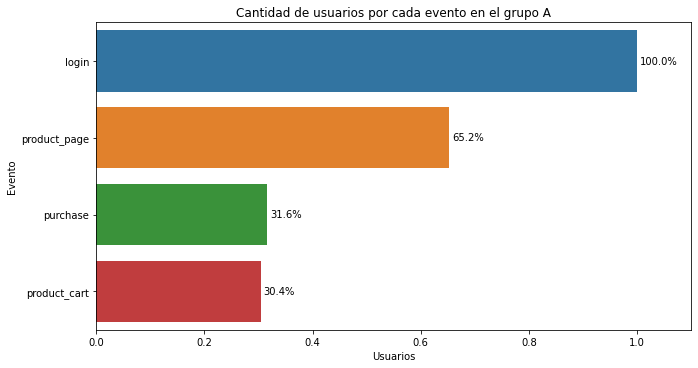

In [94]:
# creamos el grafico tipo funnel para la cantidad de eventos
crear_grafico_funnel(data=proportion_users_event_A,col_datos='proportion',col_etapas='event_name',\
                     titulo='Cantidad de usuarios por cada evento en el grupo A')

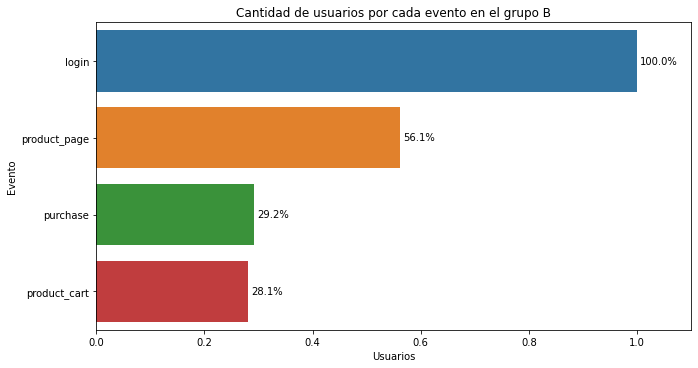

In [95]:
# creamos el grafico tipo funnel para la cantidad de eventos
crear_grafico_funnel(data=proportion_users_event_B,col_datos='proportion',col_etapas='event_name',\
                     titulo='Cantidad de usuarios por cada evento en el grupo B')

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


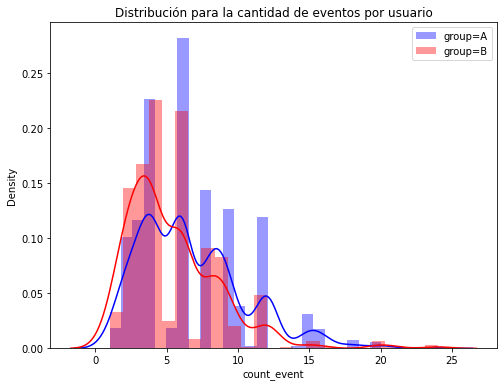

In [96]:
# creamos el gráfico de distribución para la cantidad de eventos por usuario
f,ax=plt.subplots(figsize=(8,6))
num_eventsA=ab_events_users_groups_eu.query('group=="A"').groupby('user_id')['event_name'].count()
num_eventsB=ab_events_users_groups_eu.query('group=="B"').groupby('user_id')['event_name'].count()

# distribución para la cantidad de eventos por usuario del grupo A
sns.distplot(num_eventsA,color='blue',label='group=A')


# distribución para la cantidad de eventos por usuario del grupo A
sns.distplot(num_eventsB,color='red',label='group=B')

plt.title('Distribución para la cantidad de eventos por usuario')
plt.xlabel('count_event')
plt.legend(loc='best')
plt.show()

En el gráfico anterior podemos notar que la cantidad de eventos por usuario tiene una distribución muy similar entre los dos grupos bajo estudio.

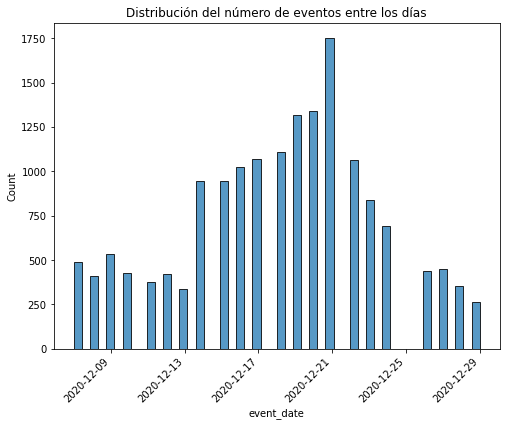

In [97]:
# observemos la distribución de la cantidad de eventos entre los días
plt.subplots(figsize=(8,6))
sns.histplot(ab_events_users_groups_eu['event_date'],bins=50)
plt.xticks(rotation=45,ha='right')
plt.title('Distribución del número de eventos entre los días')
plt.show()

Notamos que hay una gran cantidad de eventos a partir del día 2020-12-14, con un máximo el día 2020-12-21 y descendiendo posteriormente.  
El mes de diciembre es un mes donde mucha gente acostumbra a dar regalos para los días 24, 25 y 31, muy posiblemente se esperé mucha actividad de compra en las tiendas, ya sea en línea o física. Así que, realizar una prueba de aumentó de compras o navegación dentro de un sitio online muy posiblemente se vea afectado por dicha actividad de compra y no por los cambios relacionados con la introducción de un sistema de recomendaciones mejorado. Quizás sea mejor probar este nuevo sistema de recomendaciones en alguna otra fecha donde no se espere una situación de compras similar a esta época del año, aunque en esta temporada tenemos la ventaja de poder reunir mucha información para el estudio.

[Volver a contenidos](#contenidos)
## Comparación entre el grupo de control y el grupo de prueba  
Probaremos si existe diferencia entre los grupos. Vamos a calcular la tasa de conversión de los usuarios en cada uno de los eventos dentro de cada grupo.

[Volver a contenidos](#contenidos)
### Prueba t-student

In [98]:
"""Creamos una función para realizar una t-test sobre dos grupos y cada uno de los eventos"""
def ttest_comparation(data,group_1,group_2,alfa,eventos):
    """
    data= el dataframe que contiene los datos filtrados para el estudio
    group_1=el grupo_1 donde se realizará la prueba
    group_2=el group_2 donde se realizará la prueba
    alfa=el nivel de significancia para la prueba
    p1,n_group_1=la proporcion y el tamaño de la muestra del grupo_1
    p2,n_group_2=la proporcion y el tamaño de la muestra del grupo_2
    decision_H0= si se rechaza o no H0
    eventos=la lista que contiene los nombres de los eventos para los que se va a realizar la prueba
    """
    # creamos un dataframe para guardar los resultados de las pruebas
    df = pd.DataFrame(columns=['event_name', 'statistics-t','p_value','alfa','p1','n_group_1',\
                               'p2','n_group_2','decision_H0','grupos_comparados'])
    
    # creamos el ciclo para recorrer la lista de eventos
    for event in eventos:    
        # para cada usuario y grupo vamos a crear una lista
        conversions=data[['user_id','group']].drop_duplicates()

        # obtenemos los usuarios convertidos para un evento
        converted=pd.DataFrame(data={
                        "user_id":data[data['event_name']==event]\
                        ['user_id'].unique(),"converted":1})

        # unimos 'conversions' con 'converted' para crear el dataframe de los usuarios convertidos en el evento
        conversions=conversions.merge(converted,on="user_id",how="left")

        # para los usuarios no convertidos rellenamos con 'cero'
        conversions['converted']=conversions['converted'].fillna(0)

        # creamos la muestra para el group_1
        sample_group_1=conversions[conversions['group']==group_1]['converted']
        # obtenemos el tamaño de la muestra
        n1=len(sample_group_1)
        # obtenemos la proporcion de  usuarios convertidos
        p1=sample_group_1.mean()

        # creamos la muestra para el group_2
        sample_group_2=conversions[conversions['group']==group_2]['converted']
        # obtenemos el tamaño de la muestra
        n2=len(sample_group_2)
        # obtenemos la proporcion de  usuarios convertidos
        p2=sample_group_2.mean()

        # realizamos la prueba
        statistics,p_value=st.ttest_ind(sample_group_1,sample_group_2)
        
        # decision de la prueba, rechazar H0 si:
        if p_value < alfa:
            decision='Rechazar H0'
        else:
            decision='No rechazar H0'

        # guardamos cada uno de los resultados de la prueba en el dataframe
        df.loc[len(df)] = [event,statistics,p_value,alfa,p1,n1,p2,n2,decision,\
                           str(group_1)+" vs "+str(group_2)]
        
    return df

In [99]:
# obtenemos la lista de los eventos a aplicar la prueba
eventos=['product_page','product_cart','purchase']

**Probaremos la hipótesis siguiente para cada tipo de evento:**

- Hipótesis nula: la cantidad de usuarios convertidos en los grupos comparados es el mismo.

- Hipótesis alternativa: la cantidad de usuarios convertidos en los grupos comparados no es el mismo.


Ya que vamos a comparar la media de dos poblaciones, usaremos la prueba estadística `'t de Student'` (**ttes_ind**) con un nivel **alpha=0.05** de significancia. Consideraremos las varianzas de los grupos como iguales.

In [100]:
# aplicamos la funcion para realizar las pruebas t-test sobre los eventos y grupos de control
ttest_comparation(data=ab_events_users_groups_eu,group_1='A',group_2='B',alfa=0.05,eventos=eventos)

,event_name,statistics-t,p_value,alfa,p1,n_group_1,p2,n_group_2,decision_H0,grupos_comparados
0,product_page,4.231556,0.000024,0.05,0.652398,1939,0.560305,655,Rechazar H0,A vs B
1,product_cart,1.105218,0.269168,0.05,0.303765,1939,0.280916,655,No rechazar H0,A vs B
2,purchase,1.173951,0.240523,0.05,0.316142,1939,0.291603,655,No rechazar H0,A vs B


Notamos que solo el evento `'product_page'` muestra significancia estadística, lo que nos lleva a rechazar la hipótesis nula de que la cantidad de usuarios convertidos es el mismo entre los grupos comparados, usando un valor alfa de 5%.   
Según los resultados de las pruebas hay diferencias significativas para la conversión en las vistas de la página del producto. Pero el grupo `B` muestra una menor proporción en vistas comparado al grupo de control `A`, lo cual pueda deberse al tamaño de la muestra en cada uno de los grupos.

[Volver a contenidos](#contenidos)
### Prueba Z para dos proporciones

In [101]:
"""Creamos una función para realizar una Z-test sobre dos proporciones y cada uno de los eventos"""
def ztest_comparation(data,group_1,group_2,alfa,eventos):
    """
    data= el dataframe que contiene los datos filtrados para el estudio
    group_1=el grupo_1 donde se realizará la prueba
    group_2=el group_2 donde se realizará la prueba
    alfa=el nivel de significancia para la prueba
    p1,n_group_1=la proporcion y el tamaño de la muestra del grupo_1
    p2,n_group_2=la proporcion y el tamaño de la muestra del grupo_2
    decision_H0= si se rechaza o no H0
    eventos=la lista que contiene los nombres de los eventos para los que se va a realizar la prueba
    """
    # creamos un dataframe para guardar los resultados de las pruebas
    df = pd.DataFrame(columns=['event_name', 'statistics-z','p_value','alfa','p1','n_group_1',\
                               'p2','n_group_2','decision_H0','grupos_comparados'])
    
    # creamos el ciclo para recorrer la lista de eventos
    for event in eventos:    
        # para cada usuario y grupo vamos a crear una lista
        conversions=data[['user_id','group']].drop_duplicates()

        # obtenemos los usuarios convertidos para un evento
        converted=pd.DataFrame(data={
                        "user_id":data[data['event_name']==event]\
                        ['user_id'].unique(),"converted":1})

        # unimos 'conversions' con 'converted' para crear el dataframe de los usuarios convertidos en el evento
        conversions=conversions.merge(converted,on="user_id",how="left")

        # para los usuarios no convertidos rellenamos con 'cero'
        conversions['converted']=conversions['converted'].fillna(0)

        # creamos la muestra para el group_1
        sample_group_1=conversions[conversions['group']==group_1]['converted']
        # obtenemos el tamaño de la muestra
        n1=len(sample_group_1)
        # obtenemos la proporcion de  usuarios convertidos
        p1=sample_group_1.mean()

        # creamos la muestra para el group_2
        sample_group_2=conversions[conversions['group']==group_2]['converted']
        # obtenemos el tamaño de la muestra
        n2=len(sample_group_2)
        # obtenemos la proporcion de  usuarios convertidos
        p2=sample_group_2.mean()

        # realizamos la prueba
        statistics,p_value=sm.stats.proportions_ztest([n1*p1, n2*p2], [n1, n2])
        
        # decision de la prueba, rechazar H0 si:
        if p_value < alfa:
            decision='Rechazar H0'
        else:
            decision='No rechazar H0'

        # guardamos cada uno de los resultados de la prueba en el dataframe
        df.loc[len(df)] = [event,statistics,p_value,alfa,p1,n1,p2,n2,decision,\
                           str(group_1)+" vs "+str(group_2)]
        
    return df

**Probaremos la hipótesis siguiente para cada tipo de evento:**

- Hipótesis nula: la proporción de usuarios convertidos en los grupos comparados es el mismo.

- Hipótesis alternativa: la proporción de usuarios convertidos en los grupos comparados no es el mismo.


Ya que vamos a comparar la proporción entre dos poblaciones, usaremos la prueba estadística `'Z para dos proporciones'` (**stats.proportions_ztest**) con un nivel **alpha=0.05** de significancia.

In [102]:
# aplicamos la funcion para realizar las pruebas z-test sobre los eventos y grupos de control
ztest_comparation(data=ab_events_users_groups_eu,group_1='A',group_2='B',alfa=0.05,eventos=eventos)

,event_name,statistics-z,p_value,alfa,p1,n_group_1,p2,n_group_2,decision_H0,grupos_comparados
0,product_page,4.218641,0.000025,0.05,0.652398,1939,0.560305,655,Rechazar H0,A vs B
1,product_cart,1.105384,0.268993,0.05,0.303765,1939,0.280916,655,No rechazar H0,A vs B
2,purchase,1.174092,0.240358,0.05,0.316142,1939,0.291603,655,No rechazar H0,A vs B


Notamos que solo el evento `'product_page'` muestra significancia estadística, lo que nos lleva a rechazar la hipótesis nula de que la proporción de usuarios convertidos es el mismo entre los grupos comparados. Coincidiendo esto mismo con los resultados de la prueba `'t-test'`, usando un valor alfa de 5%.  
Según los resultados de las pruebas hay diferencias significativas para la conversión en las vistas de la página del producto. Nuevamente la proporción es vistas es mayor para el grupo de control.

[Volver a contenidos](#contenidos)
## Conclusiones

El evento `'product_page'` presenta diferencias estadísticas significativas y dado el valor de **p1** que muestra, al parecer la proporción es mayor **a favor del grupo A.** Esto pueda deberse al tamaño de muestra con el que se cuenta ya que inicialmente se tenían contemplados seis mil usuarios participantes y en los datos solo contamos con 2,594 apenas un 43% de lo planeado. **Además, tenemos 1,939 usuarios del grupo A y solo 655 para el grupo B,** casi 3 veces menos usuarios en el grupo B comparado al grupo A.